In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('mnist_train.csv')

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

In [5]:
#checking for null values
round(100*(df.isnull().sum()/(len(df.index))),2).sort_values(ascending = False)

28x28    0.0
10x16    0.0
10x14    0.0
10x13    0.0
10x12    0.0
        ... 
19x16    0.0
19x15    0.0
19x14    0.0
19x13    0.0
label    0.0
Length: 785, dtype: float64

In [6]:
#checking unique entries of label column
np.unique(df['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
df['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

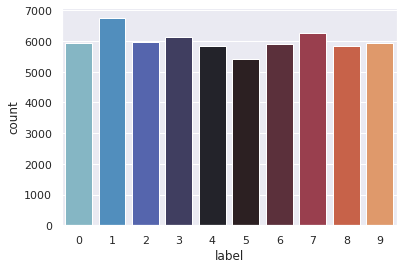

In [8]:
sns.countplot(df['label'],palette = 'icefire')

Text(0, 0.5, 'Frequency')

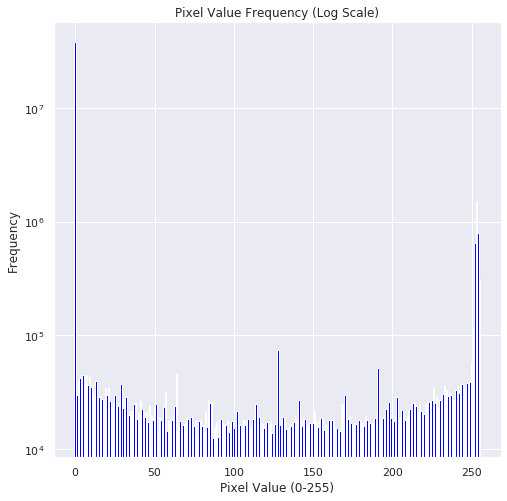

In [9]:
y = pd.value_counts(df.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Digit 4')

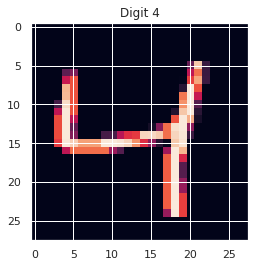

In [14]:
one = df.iloc[2, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 0')

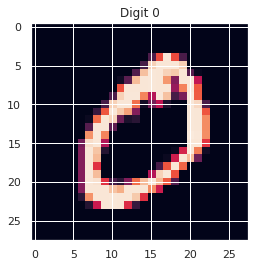

In [16]:
zero = df.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 9')

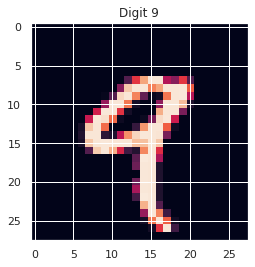

In [19]:
nine = df.iloc[4, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

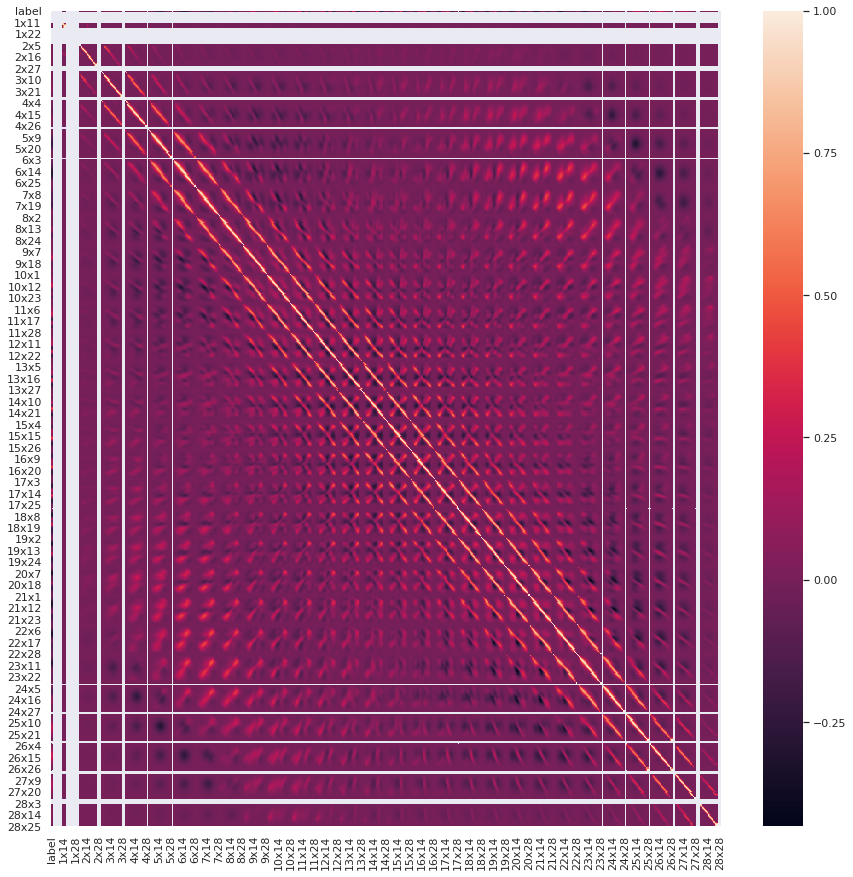

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=False)

In [10]:
# average feature values
pd.set_option('display.max_rows', 999)
round(df.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

15x16    139.55
16x16    139.11
15x17    137.10
16x15    135.69
8x16     135.40
8x17     133.34
8x15     132.76
22x15    131.84
16x17    131.80
22x14    130.37
15x15    130.27
14x17    129.81
15x18    128.09
17x16    127.43
8x18     126.68
14x18    126.60
17x15    126.47
21x16    125.56
23x14    125.30
8x14     125.00
21x15    124.95
22x16    124.87
7x16     124.10
14x16    123.97
9x14     123.39
16x14    123.20
9x15     123.04
9x17     122.73
22x13    122.59
23x13    122.52
9x16     122.34
9x18     122.14
7x17     121.71
16x18    121.44
17x17    121.06
23x15    120.61
9x13     119.44
7x15     118.51
21x17    118.22
20x16    117.80
13x18    117.58
21x14    117.34
9x19     116.26
20x17    115.92
17x14    115.86
18x16    115.44
15x14    115.42
8x19     113.55
23x12    113.10
13x17    113.04
18x15    112.62
22x12    112.46
20x15    112.45
18x17    112.24
19x16    112.20
7x18     112.03
8x13     111.58
14x15    111.37
19x17    111.35
17x18    111.22
10x19    111.08
10x18    110.88
10x13   

In [11]:
#We see that average varies between 140 to 0. It is better to scale them.
X = df.drop("label", axis = 1)
y = df['label']

In [12]:
X_scaled = scale(X)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8,test_size = 0.2, random_state = 101)

In [13]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (48000, 784)
y_train shape: (48000,)
X_test shape: (12000, 784)
y_test shape: (12000,)


In [27]:
#model-training

In [28]:
#linear kernel

In [29]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

In [30]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9205833333333333 

[[1114    1    4    1    1   18   10    2    5    2]
 [   0 1344    4    2    2    1    2    1   18    2]
 [   7   23 1101   16    8    6   13    7   23    3]
 [   7    4   44 1105    0   39    1    9   17    5]
 [   4    4   14    3 1068    2    5   11    5   29]
 [  18    7   17   45    8  969   12    6   16   10]
 [  12    3   16    1    8   15 1168    0    8    1]
 [   1    5   20    7   14    2    0 1177    4   27]
 [  15   22   27   31    7   31    6    5 1004   13]
 [   1    4    2   13   41    4    1   54    8  997]]


In [31]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1158
           1       0.95      0.98      0.96      1376
           2       0.88      0.91      0.90      1207
           3       0.90      0.90      0.90      1231
           4       0.92      0.93      0.93      1145
           5       0.89      0.87      0.88      1108
           6       0.96      0.95      0.95      1232
           7       0.93      0.94      0.93      1257
           8       0.91      0.86      0.88      1161
           9       0.92      0.89      0.90      1125

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [32]:
#non-linear kernel
#poly kernel

In [33]:
non_linear_model_poly = SVC(kernel='poly')
non_linear_model_poly.fit(X_train, y_train)
y_pred = non_linear_model_poly.predict(X_test)

In [34]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9509166666666666 

[[1111    1    2    0    4    3   10    1   26    0]
 [   0 1336   10    4    9    0    2    0   14    1]
 [   5    3 1139    6   12    1    2    3   31    5]
 [   1    3   12 1143    2   12    0    7   42    9]
 [   1    1    6    0 1113    0    3    1    5   15]
 [   1    0    3   15    5 1036   10    1   25   12]
 [   3    2    1    0   11    8 1191    0   16    0]
 [   0    4    7    2   26    0    0 1164   14   40]
 [   0    5    1    6    5    9    0    1 1126    8]
 [   0    2    1   10   29    2    0    9   20 1052]]


In [35]:
#precision, recall and f1-score
scores=metrics.classification_reportsst, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1158
           1       0.98      0.97      0.98      1376
           2       0.96      0.94      0.95      1207
           3       0.96      0.93      0.95      1231
           4       0.92      0.97      0.94      1145
           5       0.97      0.94      0.95      1108
           6       0.98      0.97      0.97      1232
           7       0.98      0.93      0.95      1257
           8       0.85      0.97      0.91      1161
           9       0.92      0.94      0.93      1125

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000



In [36]:
# non-linear model
# using rbf kernel

In [26]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.96225 

[[1134    2    4    0    1    2    9    2    4    0]
 [   0 1351    8    4    3    0    1    4    4    1]
 [   4    4 1165    6    5    0    4   11    6    2]
 [   1    2   15 1169    0   15    0   14   12    3]
 [   1    2   12    0 1093    0    4    8    3   22]
 [   4    2    4   16    4 1049   11    5    6    7]
 [   4    1    1    0    3    7 1199   11    6    0]
 [   1    4   11    2    5    0    0 1217    0   17]
 [   2    6    6    6    4    9    2    6 1109   11]
 [   0    1    3    6   14    4    1   31    4 1061]]


In [28]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1158
           1       0.98      0.98      0.98      1376
           2       0.95      0.97      0.96      1207
           3       0.97      0.95      0.96      1231
           4       0.97      0.95      0.96      1145
           5       0.97      0.95      0.96      1108
           6       0.97      0.97      0.97      1232
           7       0.93      0.97      0.95      1257
           8       0.96      0.96      0.96      1161
           9       0.94      0.94      0.94      1125

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



In [16]:
test_df = pd.read_csv('mnist_test.csv')
test_df.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_df.shape

(10000, 785)

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [19]:
Xtest = test_df.drop("label", axis = 1)
ytest = test_df['label']

In [20]:
test_scaled = scale(Xtest)

In [29]:
test_predict = model.predict(test_scaled)

In [33]:
print(metrics.confusion_matrix(ytest, test_predict), "\n")

[[ 966    0    2    2    0    3    4    2    1    0]
 [   0 1125    3    0    1    1    3    0    2    0]
 [   6    1  991    3    2    0    1   16   11    1]
 [   0    0    2  980    1    8    0   12    7    0]
 [   1    0   13    0  939    2    5    9    2   11]
 [   2    0    2   11    2  854    8    6    5    2]
 [   7    2    0    0    4    9  927    5    4    0]
 [   0    8   15    3    1    1    0  987    0   13]
 [   4    1    4    6    6   11    2   11  926    3]
 [   4    6    6   12   15    2    0   21    4  939]] 



In [31]:
scores=metrics.classification_report(ytest, test_predict, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.96      0.96       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.92      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



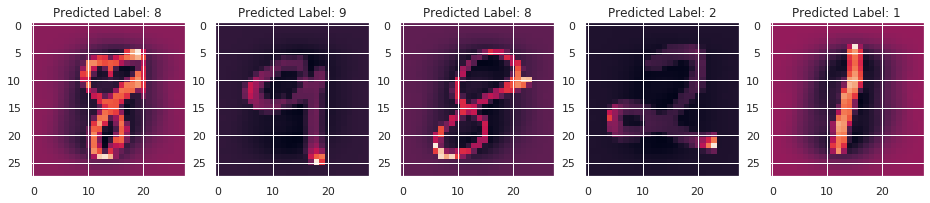

In [32]:
df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()
